# Binning methods

`shmistogram` includes multiple binning methods and makes it reasonably straightforward to define and plug in your own binning method. We'll demo these on a simulated data set:

In [1]:
import shmistogram as sh
from shmistogram.binners.agglomerate import Agglomerator
from shmistogram.binners.bayesblocks import BayesianBlocks
from shmistogram.binners.det import DensityEstimationTree
from shmistogram.simulations.univariate import cauchy_mixture

%matplotlib inline

# Simulate a mixture of Cauchy distributions
sample_values = cauchy_mixture(seed=0, truncate=True)

## Density estimation tree

The default binner is a density estimation tree. 

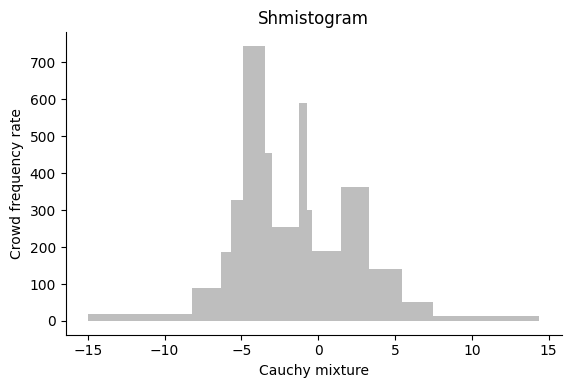

In [2]:
det = sh.Shmistogram(sample_values)
det.plot(name="Cauchy mixture")

You can configure the density estimation tree before passing it to Shmistogram. The simplest parameter is `n_bins`, which lets you directly control the number of bins in the result:

/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.leaves.loc[i + 2] = snr
/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.leaves.loc[i + 2] = snr
/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, th

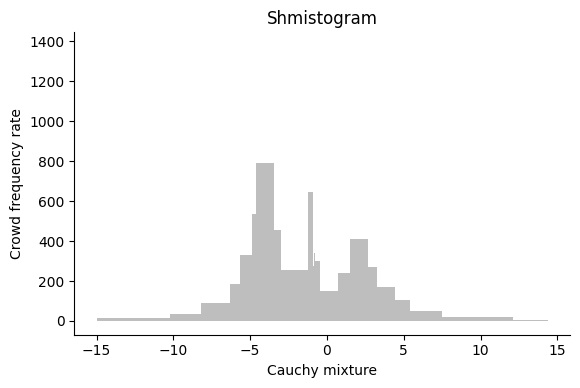

In [3]:
DET = DensityEstimationTree
det = sh.Shmistogram(sample_values, binner=DET({"n_bins": 50}))
det.plot(name="Cauchy mixture")

Regardless of whether this is statistically optimal, the bins abovee are not ideal for visualization due to the excessive white space, which results from a bin that's too narrow to see having an extremely high frequency rate. You can avoid this by increasing `min_data_in_leaf`:

/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:268: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.leaves.loc[i + 1] = snl
/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:269: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.leaves.loc[i + 2] = snr
/Users/me/Desktop/mycloud/repos/shmistogram/shmistogram/binners/det.py:268: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, th

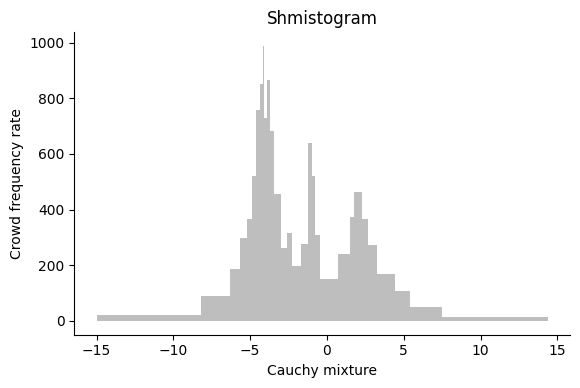

In [4]:
det = sh.Shmistogram(sample_values, binner=DET({"n_bins": 30, "min_data_in_leaf": 100}))
det.plot(name="Cauchy mixture")

## Bayesian blocks

[astropy provides an implementation](https://github.com/astropy/astropy/blob/master/astropy/stats/bayesian_blocks.py) of 
[Bayesian block representations](https://arxiv.org/pdf/1207.5578.pdf),
which are piecewise-uniform density estimate with Bayesian underpinnings:

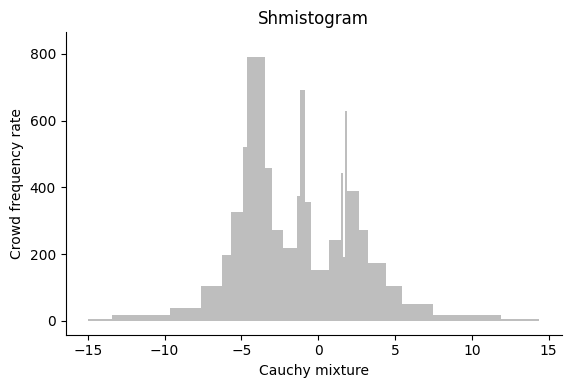

In [5]:
BB = BayesianBlocks
bayb = sh.Shmistogram(sample_values, binner=BB())
bayb.plot(name="Cauchy mixture")

You can control the average bin width somewhat by adjusting the `gamma` parameter from our default of 0.015. A larger value encourages more bins:

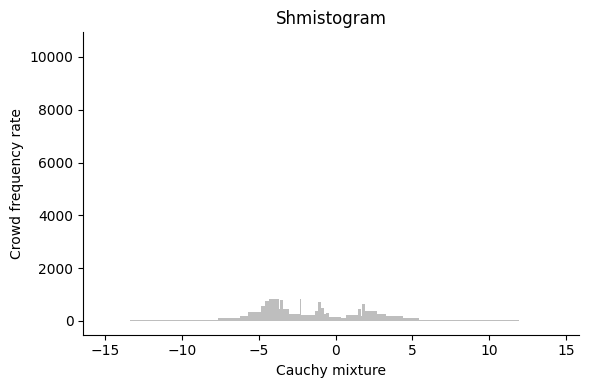

In [6]:
bayb = sh.Shmistogram(sample_values, binner=BB({"gamma": 0.04}))
bayb.plot(name="Cauchy mixture")

## Agglomerative binning

Agglomerative binning starts with a relatively large number of quantile-based bins (100 by default) and applies several heuristics to iteratively combine neighboring bins:

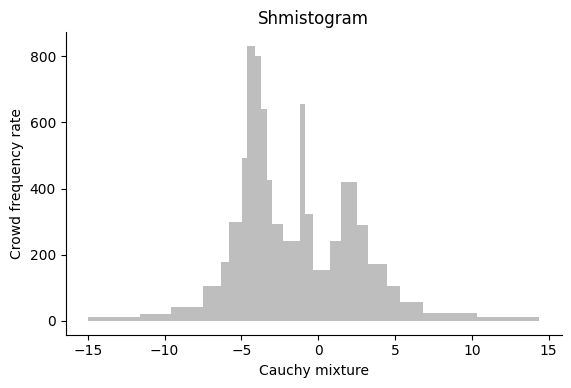

In [7]:
agg = sh.Shmistogram(sample_values, binner=Agglomerator())
agg.plot(name="Cauchy mixture")